In [1]:
##EDA for Ecommerce Text Classification 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("D:/ecommerce-text-classifaction/data/ecommerceDataset.csv",names = ['label', 'description'])

In [4]:
df.head()

,label,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [5]:
df['description'].iloc[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [6]:
# number of records with missing values

print(f"Number of records with missing values : {len(df) - len(df.dropna())}")

Number of records with missing values : 1


In [7]:
# number of duplicated records

print(f"Number of duplicate records : {df.duplicated().sum()}")

Number of duplicate records : 22622


In [8]:
# Since the number of records with missing values are 1, it is safe to drop that record
df.dropna(inplace=True)

len(df)

50424

In [9]:
# Since there are duplicated records which provide no meaning, we can drop those records also

df.drop_duplicates(inplace=True)

len(df)

27802

In [10]:
df

,label,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50402,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...
50403,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
50407,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ..."
50408,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...


In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
#  Label Encoding the target cols 

label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}

df.replace({'label': label_dict}, inplace = True)

In [13]:
# Splitting the dataset by label
data_e = df[df['label'] == 0] # Electronics
data_h = df[df['label'] == 1] # Household
data_b = df[df['label'] == 2] # Books
data_c = df[df['label'] == 3] # Clothing & Accessories

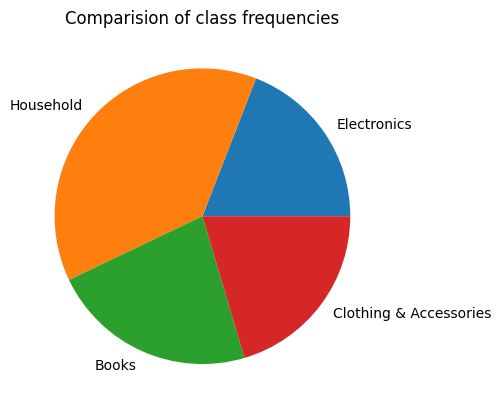

In [14]:
# Visualizing Class Frequencies

import numpy as np
from matplotlib import pyplot as plt

values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])

labels = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']

plt.title("Comparision of class frequencies")

fig = plt.pie(x=values,labels=labels)

plt.show()

In [15]:
# Distribution of number of characters in description

data_e_char = data_e['description'].str.len()
data_h_char = data_h['description'].str.len()
data_b_char = data_b['description'].str.len()
data_c_char = data_c['description'].str.len()

Text(0.5, 1.0, 'Class: Clothing & Accessories')

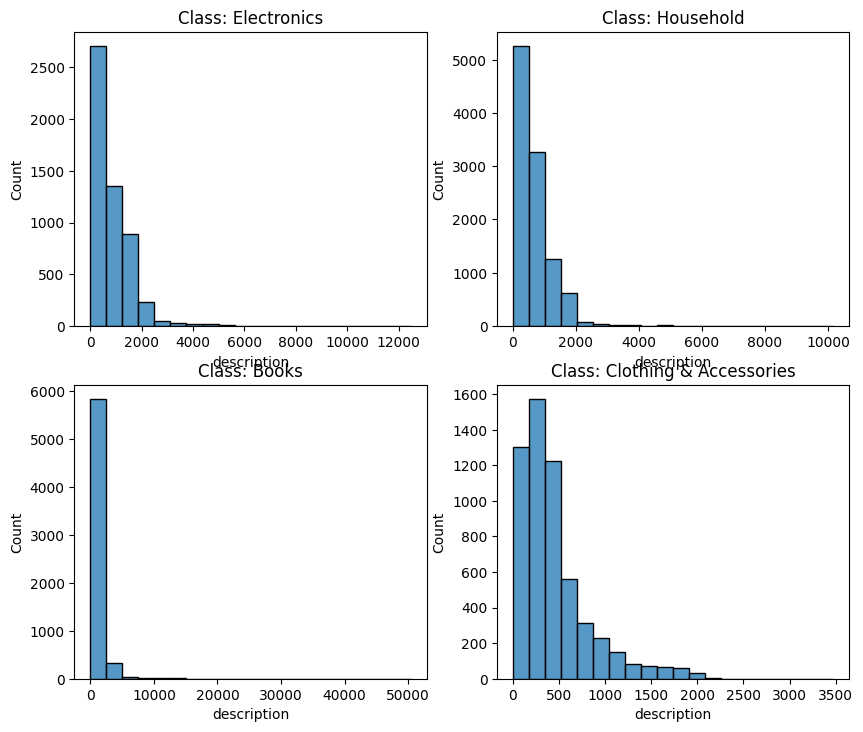

In [16]:
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)

sns.histplot(x = data_e_char, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_char, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_char, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_char, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

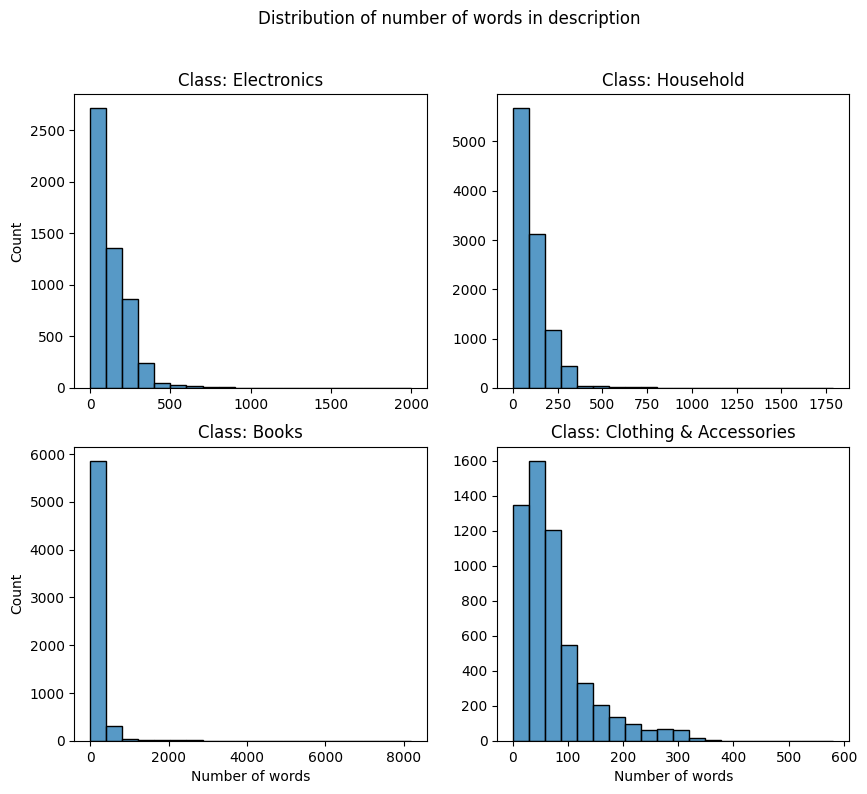

In [17]:
# Distribution of number of words in description
data_e_word = data_e['description'].str.split().map(lambda x: len(x))
data_h_word = data_h['description'].str.split().map(lambda x: len(x))
data_b_word = data_b['description'].str.split().map(lambda x: len(x))
data_c_word = data_c['description'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_word, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_word, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_word, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_word, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of words in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of words")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

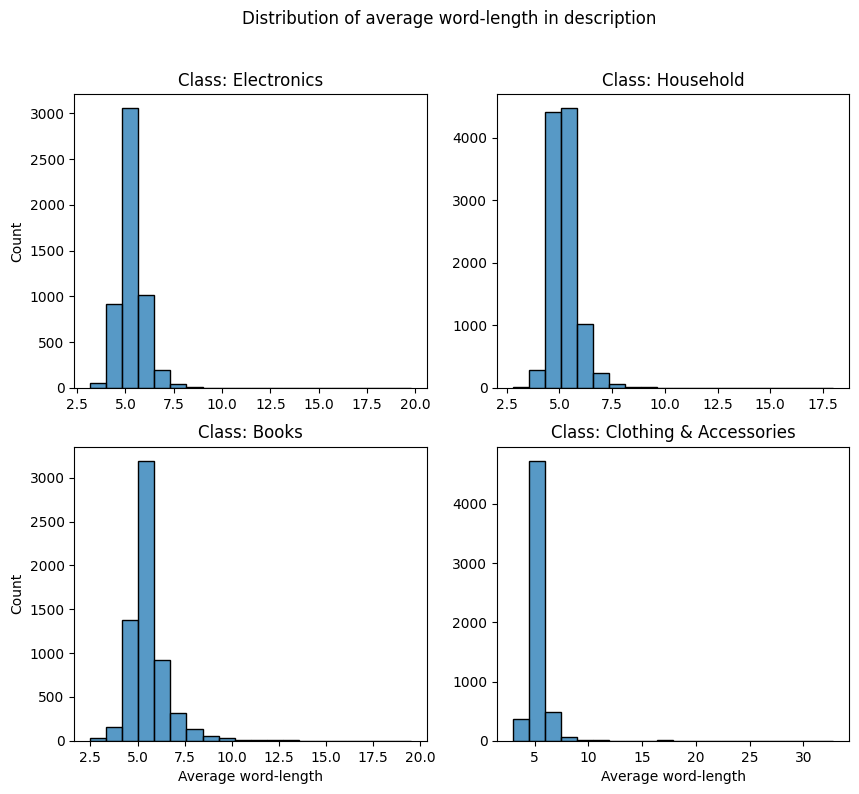

In [18]:
# Distribution of average word-length in description
data_e_avg = data_e['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_h_avg = data_h['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = data_b['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_c_avg = data_c['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_avg, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_avg, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_avg, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_avg, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of average word-length in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

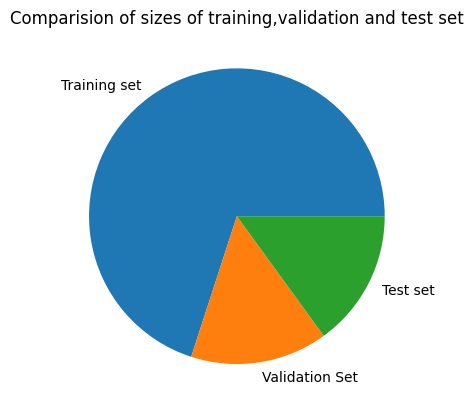

In [19]:
## Train Test Split 
from sklearn.model_selection import train_test_split

X,y = df.drop('label',axis=1),df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

data_train = pd.concat([X_train,y_train],axis=1)

X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

data_val = pd.concat([X_val,y_val],axis=1)

data_test = pd.concat([X_test,y_test],axis=1)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])

labels = ['Training set', 'Validation Set', 'Test set']

plt.title("Comparision of sizes of training,validation and test set")

plt.pie(x=values,labels=labels)

plt.show()


In [20]:
## Converting text to lowercase

convert_to_lowercase = lambda text : text.lower()

In [21]:
## Removing whitespaces 

remove_whitespace = lambda text : text.strip()

In [22]:
## Removing punctuations

import string

remove_punctuation = lambda text : text.translate(str.maketrans("", "", string.punctuation.replace("'", "")))

In [23]:
## Removal of unicode characters

import re

remove_html = lambda text : re.compile(r'<.*?>').sub(r'',text)

In [24]:
## Removing emojis
    
remove_emoji = lambda text : re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE).sub(r'',text)

In [25]:
## Removing other unicode characters like http

remove_http = lambda text : re.sub(r"({})".format("https?://\S+|www\.\S+"), "", text)

In [26]:

## Replacing acronyms

acronyms_dict = pd.read_json("english_acronyms.json", typ = 'series')

acronyms_df = pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

acronyms_list = list(acronyms_dict.keys())

In [27]:
## Convert contractions in text

from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer("[\w']+")

def convert_acronyms(text):
    words = []
    
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
            
    text_converted = " ".join(words)
    
    return text_converted

In [28]:
## Substitution of Contractions

from urllib.request import urlretrieve

contractions_dict = pd.read_json("english_contractions.json", typ = 'series')

df_contractions = pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

contractions_list = list(contractions_dict.keys())

In [29]:
def convert_contractions(text):
    words = []

    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()

        else:
            words = words + word.split()
    
    text_converted = " ".join(words)

    return text_converted


In [30]:
from nltk.corpus import stopwords

stops = stopwords.words("english")

addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"]

all_stopwords = stops + addstops

In [31]:
## Removing stop words
remove_stopwords = lambda text : " ".join([word for word in regexp.tokenize(text) if word not in all_stopwords])

In [32]:
## Correcting spelling

from spellchecker import SpellChecker

spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    
    word_list_corrected = []
    
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
    
            if word_corrected == None:
                word_list_corrected.append(word)
    
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    
    text_corrected = " ".join(word_list_corrected)
    
    return text_corrected


In [33]:
## Applying Stemming

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

text_stemmer = lambda text: " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])


In [34]:
## Applying Lemmatization

import spacy

spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

text_lemmatizer = lambda text : " ".join([token.lemma_ for token in spacy_lemmatizer(text)])

In [35]:
## Removing non alphabetic words

discard_non_alpha = lambda text : " ".join([word for word in regexp.tokenize(text) if word.isalpha()])


In [36]:
## Retainment of revelant POS
import nltk

def keep_pos(text):
    tokens = regexp.tokenize(text)
    
    tokens_tagged = nltk.pos_tag(tokens)
    
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    
    return " ".join(keep_words)

In [37]:
## Removing additional stop words
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]

prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]

coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]

correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]

subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]

others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]

additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

remove_additional_stopwords = lambda text : " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

In [38]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    
    text = remove_whitespace(text)
    
    text = re.sub('\n' , '', text) # converting text to one line
    
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    
    text = remove_http(text)
    
    text = remove_punctuation(text)
    
    text = remove_html(text)
    
    text = remove_emoji(text)
    
    text = convert_acronyms(text)
    
    text = convert_contractions(text)
    
    text = remove_stopwords(text)
    
    # text = pyspellchecker(text)
    
    text = text_lemmatizer(text) 
    
    text = discard_non_alpha(text)
    
    text = keep_pos(text)
    
    text = remove_additional_stopwords(text)
    
    return text

In [39]:
text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))

print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function function apply product description


In [40]:
## Testing the text_normalizer function on the product description

data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

data_train_norm['normalized description'] = data_train['description'].apply(text_normalizer)
data_val_norm['normalized description'] = data_val['description'].apply(text_normalizer)
data_test_norm['normalized description'] = data_test['description'].apply(text_normalizer)

data_train_norm['label'] = data_train['label']
data_val_norm['label'] = data_val['label']
data_test_norm['label'] = data_test['label']

data_train_norm

,normalized description,label
26250,turn point review praise danielle steel steel ...,0
13883,import red earthworm fishing bait worm lure cr...,2
841,jiya creation style alcodrum bar cabinet door ...,1
26143,vanguard endeavor hd angle spot scope magnific...,0
20187,justkartit woman georgette parda layer abaya b...,3
...,...,...
21575,royal shop silky sport air woman combo skin si...,3
5390,eliture stainless steel induction saucepan sil...,1
860,creation stainless steel side peg measure bar ...,1
15795,see book patient see topol expertly build path...,2


In [41]:
# Features and labels
X_train_norm, y_train = data_train_norm['normalized description'].tolist(), data_train_norm['label'].tolist()

X_val_norm, y_val = data_val_norm['normalized description'].tolist(), data_val_norm['label'].tolist()

X_test_norm, y_test = data_test_norm['normalized description'].tolist(), data_test_norm['label'].tolist()

In [42]:
# TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVec = TfidfVectorizer(ngram_range = (1, 1))

X_train_tfidf = TfidfVec.fit_transform(X_train_norm)

X_val_tfidf = TfidfVec.transform(X_val_norm)

X_test_tfidf = TfidfVec.transform(X_test_norm)

In [44]:
## Train models with TFIDF vectorization 

from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from time import time

names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    
    x = time()
    
    for model in models:
        model.fit(X_train, y_train)
    
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
    
        score_train.append(accuracy_score(y_train, y_train_pred))
    
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    
    return score_df

In [45]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
3,Linear SVM,0.978110,0.952278
6,Ridge Classifier,0.983814,0.950839
5,SGD Classifier,0.970505,0.947962
0,Logistic Regression,0.966651,0.944844
4,Random Forest,0.999846,0.924700
7,XGBoost,0.961975,0.922782
1,KNN Classifier,0.909768,0.912950
2,Decision Tree,0.999846,0.863070
8,AdaBoost,0.800935,0.789928


In [ ]:
# ## Hyperparameter tuning with TFIDF

# from sklearn.model_selection import ParameterGrid

# svm_classifier = SVC()

# params_svm = {
#     'kernel': ['linear'],
#     'C': [0.1, 1, 10, 100]
# }

# best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0

# for g in ParameterGrid(params_svm):
#     time_start = time()
    
#     count += 1
    
#     print(f"Gridpoint #{count}: {g}")
    
#     svm_classifier.set_params(**g)
    
#     svm_classifier.fit(X_train_tfidf, y_train)
    
#     y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
    
#     score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    
#     time_stop = time()
    
#     m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    
#     print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    
#     print(" ")
    
#     if score_val > best_score_svm:
#         best_params_svm, best_score_svm = g, score_val

# best_model_tfidf, best_params_tfidf, best_score_tfidf = SVC(), best_params_svm, best_score_svm

# best_model_tfidf.set_params(**best_params_tfidf)

# print(f"Best model: {best_model_tfidf}")

# print(" ") 

# print(f"Best parameters: {best_params_tfidf}")

# print(f"Best validation accuracy: {best_score_tfidf}")

In [46]:
from sklearn.model_selection import GridSearchCV

svm_params = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100]
}

svm_classifier = SVC()

svm_grid = GridSearchCV(estimator=svm_classifier,param_grid=svm_params,verbose=3,cv=5,n_jobs=-1,scoring="accuracy")

svm_grid.fit(X_train_tfidf, y_train)

print(f"SVM best params : {svm_grid.best_params_}")

print(f"SVM best score : {svm_grid.best_score_}")

svm_classifier.set_params(**svm_grid.best_params_)

best_model_tfidf, best_params_tfidf, best_score_tfidf = SVC(), svm_grid.best_params_, svm_grid.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
SVM best params : {'C': 1, 'kernel': 'linear'}
SVM best score : 0.9465600496741059


In [47]:
## Word2Vec Model

import pandas as pd

df = pd.read_json("english_contractions.json",typ="series")

In [48]:
## Text Preprocessing for Word2Vec Model

convert_to_lowercase_1 = lambda text : text.lower()

contractions_dict = pd.read_json("english_contractions.json", typ = 'series')

contractions_list = list(contractions_dict.keys())

In [49]:
def convert_contractions(text):
    words = []
    
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
    
        else:
            words = words + word.split()
    
    return " ".join(words)

In [50]:
# Text normalization for Word2Vec
for df in [data_train, data_val, data_test]:
    df['tokens'] = (df["description"].apply(convert_to_lowercase)
                                     .apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['tokens', 'label']]

,tokens,label
26250,"[turning, point, review, praise, for, danielle...",0
13883,"[imported, 100pcs, red, soft, earthworm, fishi...",2
841,"[jiya, creation, colonial, style, alcodrum, ba...",1
26143,"[vanguard, endeavor, hd, 82a, angled, eyepiece...",0
20187,"[justkartit, women's, georgette, niqab, parda,...",3
...,...,...
21575,"[e, royal, shop, silky, sport, air, bra, for, ...",3
5390,"[eliture, single, stainless, steel, induction,...",1
860,"[saanvi, creations, stainless, steel, double, ...",1
15795,"[the, patient, will, see, you, now, review, in...",2


In [51]:
## Word Embedding
import gensim

word2vec_path = 'GoogleNews-vectors-negative300.bin'

word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary = True)

In [52]:
from matplotlib import patches as mpatches
from sklearn.decomposition import TruncatedSVD
from matplotlib.colors import ListedColormap

def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    
    length = len(vectorized)
    
    summed = np.sum(vectorized, axis = 0)
    
    averaged = np.divide(summed, length)
    
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    
    return list(embeddings)

def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    
    truncated_SVD.fit(X)
    
    scores = truncated_SVD.transform(X)
    
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    
    color_column = [color_mapper[label] for label in y]
    
    colors = ['red', 'blue', 'green', 'black']
        
    plt.scatter(scores[:, 0], scores[:, 1], s = 8, alpha = 0.8, c = y, cmap = ListedColormap(colors))
    
    red_patch = mpatches.Patch(color = 'red', label = 'Electronics')
    
    blue_patch = mpatches.Patch(color = 'blue', label = 'Household')
    
    green_patch = mpatches.Patch(color = 'green', label = 'Books')
    
    black_patch = mpatches.Patch(color = 'black', label = 'Clothing & Accessories')
    
    plt.legend(handles = [red_patch, blue_patch, green_patch, black_patch], prop = {"size": 12})

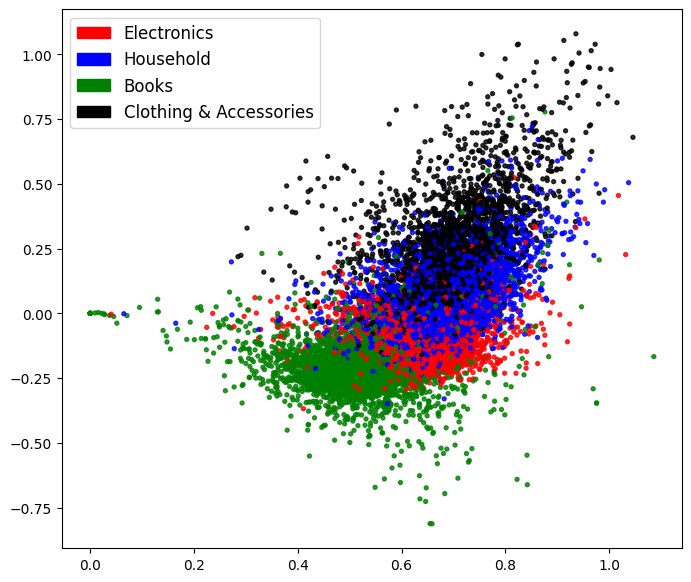

In [53]:
# Word2Vec embedding
X_train_embed = get_word2vec_embeddings(word2vec, data_train['tokens'])
X_val_embed = get_word2vec_embeddings(word2vec, data_val['tokens'])
X_test_embed = get_word2vec_embeddings(word2vec, data_test['tokens'])

fig = plt.figure(figsize = (8, 7))          
plot_embedding(X_train_embed, y_train)
plt.show()

In [54]:
# Converting to Compressed Sparse Row matrix

from scipy.sparse import csr_matrix

X_train_w2v = csr_matrix(X_train_embed)

X_val_w2v = csr_matrix(X_val_embed)

X_test_w2v = csr_matrix(X_test_embed)

In [55]:
## Training models with Word2Vec

score(X_train_w2v, y_train, X_val_w2v, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
7,XGBoost,0.999897,0.937650
3,Linear SVM,0.936180,0.930456
5,SGD Classifier,0.930939,0.926619
0,Logistic Regression,0.931042,0.926379
4,Random Forest,0.999897,0.923501
6,Ridge Classifier,0.921946,0.915348
1,KNN Classifier,0.911772,0.904796
8,AdaBoost,0.866965,0.868106
2,Decision Tree,0.999897,0.801199


In [ ]:
# ## Word2Vec hyperparameter tuning

# xgb = XGBClassifier()

# params_xgb = {
#     'learning_rate': [0.03, 0.3],
#     'min_child_weight': [0, 10],
#     'n_estimators': [200],
#     'reg_lambda': [1, 2],
#     'seed': [40]
# }

# best_model_xgb, best_params_xgb, best_score_xgb, count = xgb, ParameterGrid(params_xgb)[0], 0, 0

# for g in ParameterGrid(params_xgb):
#     time_start = time()

#     count += 1

#     print(f"Gridpoint #{count}: {g}")

#     xgb.set_params(**g)

#     xgb.fit(X_train_w2v, y_train)

#     y_train_pred, y_val_pred = xgb.predict(X_train_w2v), xgb.predict(X_val_w2v)

#     score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)

#     time_stop = time()

#     m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60

#     print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")

#     print(" ")

#     if score_val > best_score_xgb:
#         best_params_xgb, best_score_xgb = g, score_val


# best_model_w2v, best_params_w2v, best_score_w2v = XGBClassifier(), best_params_xgb, best_score_xgb

# best_model_w2v.set_params(**best_params_w2v)

# print(f"Best model: {best_model_w2v}")

# print(" ")

# print(f"Best parameters: {best_params_w2v}")

# print(f"Best validation accuracy: {best_score_w2v}")

In [56]:
from sklearn.model_selection import GridSearchCV

xgb_classifier = XGBClassifier()

xgb_params = {
    'learning_rate': [0.03, 0.3],
    'min_child_weight': [0, 10],
    'n_estimators': [200],
    'reg_lambda': [1, 2],
    'seed': [40]
}

xgb_grid = GridSearchCV(estimator=xgb_classifier,param_grid=xgb_params,verbose=3,cv=5,n_jobs=-1,scoring="accuracy")

xgb_grid.fit(X_train_tfidf, y_train)

print(f"SVM best params : {xgb_grid.best_params_}")

xgb_classifier.set_params(**xgb_grid.best_params_)

best_model_w2v, best_params_w2v, best_score_w2v = XGBClassifier(), xgb_grid.best_params_, xgb_grid.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM best params : {'learning_rate': 0.3, 'min_child_weight': 0, 'n_estimators': 200, 'reg_lambda': 1, 'seed': 40}


In [60]:
# Function to compute and print confusion matrix

from sklearn.metrics import confusion_matrix

def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3] # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    
    confusion_matrix_ = confusion_matrix(y_test, y_test_pred)
    
    confusion_matrix_df = pd.DataFrame(confusion_matrix_, range(4), range(4))
    
    plt.figure(figsize = figsize)
    
    sns.set(font_scale = font_scale) # label size
    
    plt.title("Confusion Matrix")
    
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd') # font size
    
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    
    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')
    
    plt.grid(False)
    
    plt.show()

In [61]:
if best_score_tfidf >= best_score_w2v:
    best_model, X_train_vec, X_test_vec = best_model_tfidf, X_train_tfidf, X_test_tfidf
    
else:
    best_model, X_train_vec, X_test_vec = best_model_w2v, X_train_w2v, X_test_w2v

Test accuracy    0.954927
 


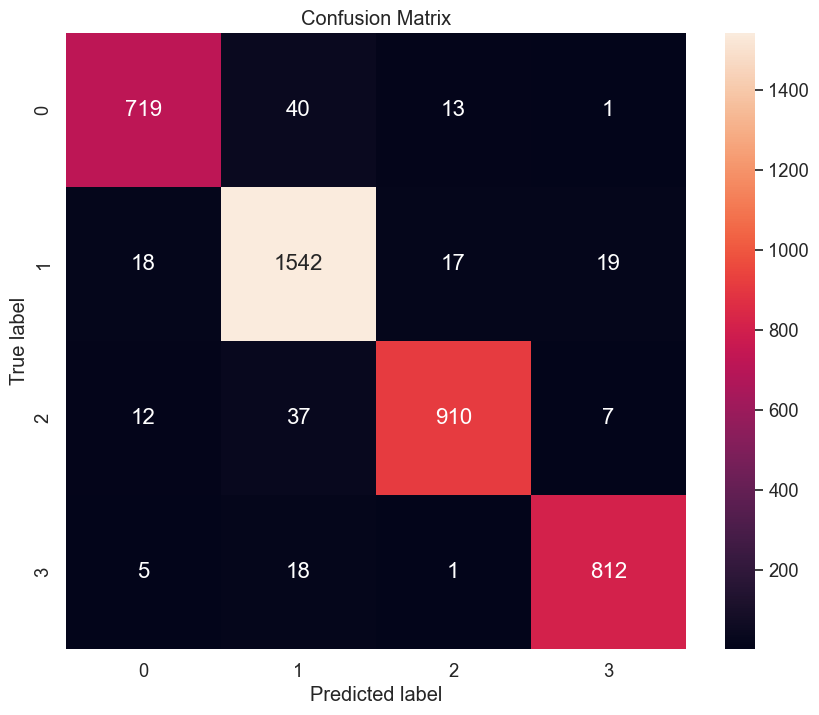

In [62]:
# Prediction and evaluation on test set
best_model.fit(X_train_vec, y_train)

y_test_pred = best_model.predict(X_test_vec)

score_test = accuracy_score(y_test, y_test_pred)

print(pd.Series({"Test accuracy": score_test}).to_string())

print(" ")

conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16) # Confusion matrix